# Python + IPython (Jupyter) intro folytatás

## Egy példa betöltése

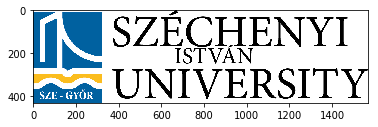

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

img1 = cv2.imread("sze.jpg")
img1 = img1[:,:,::-1]
plt.imshow(img1)
plt.show()




## Konvolúció képeken

A konvulúciós kernelek a kép adott részhalmazán vett mátrixszorzást hajtanak végre.

A következő 3x3-as kernel ($K_1$)a középső pixel feletti pixel értékét másolja mindig az új képre, így egy pixellel "elshiftelt" képet fogunk kapni:

$K_1 = \left[ \begin{array}{cccc}
0 & 1 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 \\\end{array} \right]$

<img src="img/conv1.png">

Ennél érdekesebb az átlagoló kernel ($K_2, K_3, K_4$). A kernel elemeinek összegének célszerű 1-nek lennie. (Próbaképp nézzük meg, mi lenne 1-nél nagyobb és 1-nél kisebb értékeknél).

*Megjegyzés:* Az átlagoló kernelt hívják box blur vagy normalized kernelnek is.


$K_2 = \frac{1}{25}\left[ \begin{array}{cccc}
1 & 1 & 1 & 1 & 1  \\
1 & 1 & 1 & 1 & 1  \\
1 & 1 & 1 & 1 & 1  \\
1 & 1 & 1 & 1 & 1  \\
1 & 1 & 1 & 1 & 1  \\\end{array} \right]
= \left[ \begin{array}{cccc}
0.04 & 0.04 & 0.04 & 0.04 & 0.04  \\
0.04 & 0.04 & 0.04 & 0.04 & 0.04  \\
0.04 & 0.04 & 0.04 & 0.04 & 0.04  \\
0.04 & 0.04 & 0.04 & 0.04 & 0.04  \\
0.04 & 0.04 & 0.04 & 0.04 & 0.04  \\\end{array} \right]
$

$K_3 = \frac{1}{36}\left[ \begin{array}{cccc}
1 & 1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 & 1 \\\end{array} \right]$


Pythonban a $K_2$ kernelt a következőképp deklarálhatjuk: 



In [2]:
kernel2 = np.ones((5, 5), np.float32) / 25
print(kernel2)

[[ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]
 [ 0.04  0.04  0.04  0.04  0.04]]


... és a következőképp alkalmazhatjuk a kerneleket:

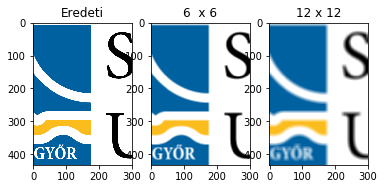

In [3]:
img2 = img1[:, 150:450, :] # kivágás a kettőspont operátorral
kernel3 = np.ones((6, 6),np.float32) / 36
kernel4 = np.ones((12, 12),np.float32) / 144
img3 = cv2.filter2D(img2, -1, kernel3)
img4 = cv2.filter2D(img2, -1, kernel4)

plt.subplot(131),plt.imshow(img2),plt.title('Eredeti')
plt.subplot(132),plt.imshow(img3),plt.title('6  x 6')
plt.subplot(133),plt.imshow(img4),plt.title('12 x 12')
plt.show()

A következő kernelek ($K_5, K_6$) élkeresésre alkamasak (edge detection).

$K_5 = \left[ \begin{array}{cccc}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 \\\end{array} \right]$


$K_6 = \left[ \begin{array}{cccc}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0 \\\end{array} \right]$

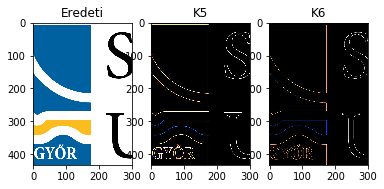

In [6]:
kernel5 = np.ones((3, 3),np.float32) * - 1
kernel5[1][1] = 8
# kernel5 = kernel5 / 2
kernel6 = np.matrix('0 1 0; 1 -4 1; 0 1 0')

img5 = cv2.filter2D(img2, -1, kernel5)
img6 = cv2.filter2D(img2, -1, kernel6)

plt.subplot(131),plt.imshow(img2),plt.title('Eredeti')
plt.subplot(132),plt.imshow(img5),plt.title('K5')
plt.subplot(133),plt.imshow(img6),plt.title('K6')
plt.show()

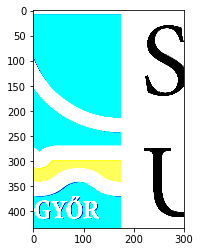

kernel7:
 [[-2  1  0]
 [-1  1  1]
 [ 0  1  2]]


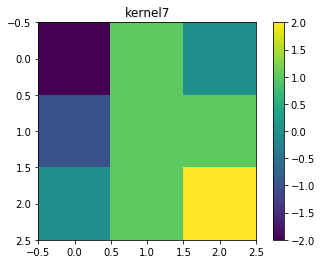

In [7]:
kernel7 = np.matrix('-2 1 0; -1 1 1; 0 1 2')
img7 = cv2.filter2D(img2, -1, kernel7)
plt.imshow(img7)
plt.show()

print("kernel7:\n", kernel7)
plt.imshow(kernel7)
plt.title('kernel7')
plt.colorbar()
plt.show()

## Nézzük másik képeken.


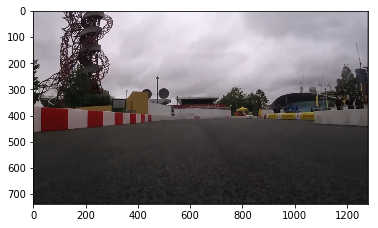

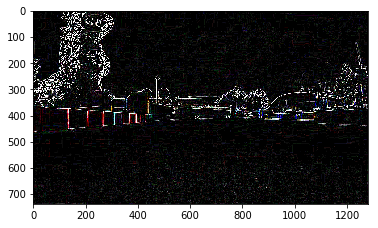

In [89]:
kernel5 = np.ones((3, 3),np.float32) * - 1
kernel5[1][1] = 8
kernel5 = kernel5 * 4
r11 = cv2.imread("road01.png")
r11 = r11[:,:,::-1]
r12 = cv2.filter2D(r11, -1, kernel5)
plt.imshow(r11)
plt.show()
plt.imshow(r12)
plt.show()
# print(kernel5)

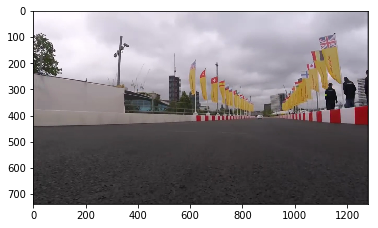

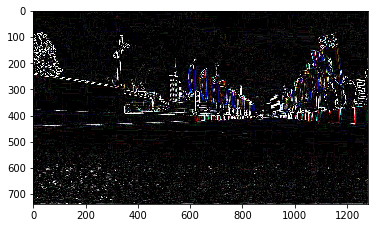

In [90]:
kernel5 = np.ones((3, 3),np.float32) * - 1
kernel5[1][1] = 8
kernel5 = kernel5 * 4
r21 = cv2.imread("road02.png")
r21 = r21[:,:,::-1]
r22 = cv2.filter2D(r21, -1, kernel5)
plt.imshow(r21)
plt.show()
plt.imshow(r22)
plt.show()
# print(kernel5)